In [1]:
f(x) = exp(x) - 2.0

f (generic function with 1 method)

In [2]:
left, right = 0.0, 1.0 # 最初の区間の左端と右端．

sq = [ left right ] # 区間情報を記録しておく．これは横ベクトル．

for i in 0:100
    av = (left + right)/2 # 区間の真ん中の値

    println("$i : $left, $right : $(f(av))") # 状況を画面に

    if abs(f(av)) < 1.0e-8  # 8桁ぐらい合っていたらループを脱出
        break
    end

    if f(left)*f(av) < 0 # f(left)と f(av) が異なる符号ならば
        right = av # 次の区間は [ left, av ] に.
    else
        left = av # そうでなければこちら.
    end
    sq = vcat(sq, [ left right ]) # 新しい区間を sq の下に追加．
end

0 : 0.0, 1.0 : -0.3512787292998718
1 : 0.5, 1.0 : 0.11700001661267478
2 : 0.5, 0.75 : -0.13175404256777767
3 : 0.625, 0.75 : -0.011262530417708083
4 : 0.6875, 0.75 : 0.05186677348797675
5 : 0.6875, 0.71875 : 0.020055527708696452
6 : 0.6875, 0.703125 : 0.004335330874331245
7 : 0.6875, 0.6953125 : -0.003478832038737778
8 : 0.69140625, 0.6953125 : 0.0004244339097745353
9 : 0.69140625, 0.693359375 : -0.0015281520101939616
10 : 0.6923828125, 0.693359375 : -0.0005520974029782355
11 : 0.69287109375, 0.693359375 : -6.389134934270402e-5
12 : 0.693115234375, 0.693359375 : 0.00018025637771179603
13 : 0.693115234375, 0.6932373046875 : 5.8178788785667734e-5
14 : 0.693115234375, 0.69317626953125 : -2.8572115997604897e-6
15 : 0.693145751953125, 0.69317626953125 : 2.7660555759201344e-5
16 : 0.693145751953125, 0.6931610107421875 : 1.2401613871837469e-5
17 : 0.693145751953125, 0.6931533813476562 : 4.772186584123261e-6
18 : 0.693145751953125, 0.6931495666503906 : 9.574838539805341e-7
19 : 0.6931457519531

In [3]:
using Plots

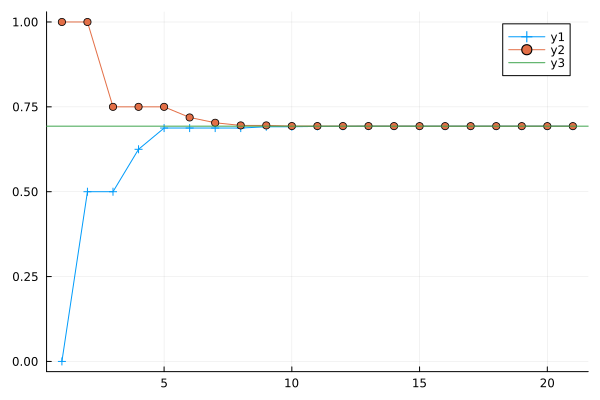

In [4]:
plot(sq, marker = :auto)

hline!( [ log(2.0) ]  )  # hline! は水平線を指定された高さで描く

In [5]:
using NLsolve

In [6]:
function nls(func, params...; ini = [0.0])
    if typeof(ini) <: Number
        r = nlsolve((vout,vin)->vout[1]=func(vin[1],params...), [ini])
        v = r.zero[1]
    else
        r = nlsolve((vout,vin)->vout .= func(vin,params...), ini)
        v = r.zero
    end
    return v, r.f_converged
end

nls (generic function with 1 method)

In [7]:
f(x) = cos(x) - 1/7
sol = nls(f, ini = 1.0)  # ini = 1.0 は近似根 x の探索初期値．

(1.4274487588352782, true)

In [8]:
x = sol[1]  # 並んでいるデータの一つ目を取り出す．
f(x)  # そして、f に代入して、ゼロに近いかどうかを見てみる．

-9.360467123631366e-10

In [9]:
f(x,p) = x^2 - p
nls(f, 2.0, ini=1.0) # 二つ目の引数 2.0 はパラメータ

(1.4142135623746899, true)

In [10]:
f(x,p) = x^2 - p
nls(f, -0.0001, ini = 1.0)
# x^2 = - 0.0001 を解こうとしているが、当然、実数解は存在しない…

(-4.385150007238086e-11, false)

In [11]:
function f(vx)
    x, y = vx
    return [
        x+2y+1
        x^2+2y^2-1
    ]
end

f (generic function with 2 methods)

In [12]:
nls(f, ini = [1.0, 0.0])

([0.3333333341166318, -0.6666666670583159], true)

In [13]:
# 対象の関数を定義．これが ゼロになるような u を求めたい．
Δt, γ = 0.1, 1.0
f(x, U) = x - U - Δt*γ*(sin((x+U)/2))^1.2

nls(f, 3.0, ini = 1.0) # 二つ目の引数 3.0 はパラメータ．ini = 1.0 は近似根 x の探索初期値．

(3.0091718885079293, true)

In [15]:
function h(u, p, q)
    a,b = u
    return [ cos(a)^2 + sin(b)^2 - p, sin(a)^2 - cos(b)^2 - q ]
end

h (generic function with 1 method)

In [17]:
p = 0.5
q = 0.4
ini_v = [4.0,4.0]

sol = nls(h, p, q, ini = ini_v) # パラメータが複数でも大丈夫．

([4.486875574486246, 3.8769071064064615], true)